In [1]:
import pandas as pd

In [28]:
smaller_df = pd.read_csv('winemag-data-130k-v2.csv')
larger_df = pd.read_csv('winemag-data_first150k.csv')

In [29]:
smaller_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [30]:
larger_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [31]:
print('~~~~~~~~~~~Row before dropping NAs: {}~~~~~~~~~~~'.format(len(larger_df)))
larger_df.dropna(subset=['price'], inplace=True)
print('~~~~~~~~~~~Row after dropping NAs: {}~~~~~~~~~~~'.format(len(larger_df)))


~~~~~~~~~~~Row before dropping NAs: 150930~~~~~~~~~~~
~~~~~~~~~~~Row after dropping NAs: 137235~~~~~~~~~~~


In [51]:
samples = 200
max_price = 150

# Pull Germany
germany = larger_df[(larger_df.country=='Germany') & (larger_df.price<max_price)].sample(samples)

# Pull US
united_states = larger_df[(larger_df.country=='US') & (larger_df.price<max_price)].sample(samples)

# Pull Spain 
france = larger_df[(larger_df.country=='France') & (larger_df.price<max_price)].sample(samples)


data_list = [germany, united_states, france]
all_data = pd.concat(data_list)

all_data.country.value_counts()

Germany    200
France     200
US         200
Name: country, dtype: int64

In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [53]:


model = ols('price ~ country', data=all_data).fit()
anova = sm.stats.anova_lm(model, typ=2)

In [54]:
anova

,sum_sq,df,F,PR(>F)
country,3910.643333,2.0,3.594937,0.028059
Residual,324714.155000,597.0,NaN,NaN


In [55]:
print(larger_df[larger_df.country=='Spain'].isna().sum())

Unnamed: 0        0
country           0
description       0
designation    1703
points            0
price             0
province          0
region_1          0
region_2       8160
variety           0
winery            0
dtype: int64


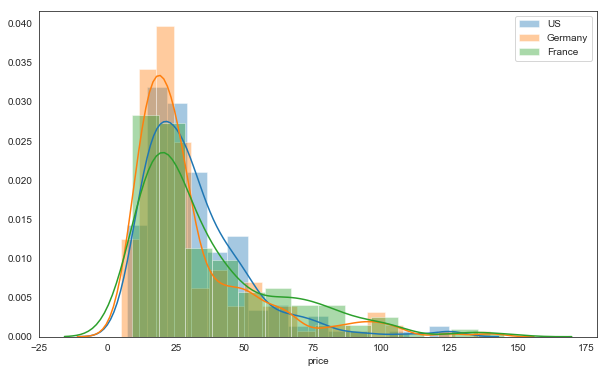

In [61]:
sns.set_style("white")
plt.figure(figsize=(10, 6))

for name in ['US', 'Germany', 'France']:
    sns.distplot(all_data[all_data.country==name].price)
    
    
plt.legend(['US', 'Germany', 'France'])
plt.show()